# Swerve Drive Auton Distance Calibration

27 Jan 2018

Stryke Force students conducted an experiment to determine the effect of compliance at the wheel to surface interface on effective wheel circumference.

One inch of travel along the circumference of a wheel will subtend a larger angle (represented by encoder ticks) when the effective radius is smaller. This would lead us to expect larger ticks/inch for more compliant surfaces.

The nominal tick/in from axis setup Excel is 1983.65 ticks/in.

## Protocol

### Surfaces Tested

   - Carpet, north to south
   - Carpet, east to west
   - Hard concrete, floor next to field

### Procedure

Runs are made in the same direction, with the same starting point.

1. Open the Grapher program, select **Selected Sensor Position** to measure encoder on each drive motor
2. Place all four motor variables on the same y-axis in the Grapher
3. Place the robot in a known position with an appropriate space in front of it (against a wall/barrier, something that won't move)
4. Ensure the robot drives straight
5. Record the initial Selective Sensor Position in a column spreadsheet program for each motor (WARNING: Make sure the Grapher can display the appropriate number of digits in the text boxes containing the Selective Sensor Position.  You may have to zero-out the encoder and/or reduce displacement in trials to ensure they fit on the display)
6. Select an appropriate duration and velocity for the robot, then (respecting safety procedures) allow the robot to move forward as such
7. Record the final Selective Sensor Position in a different set of columns in the spreadsheet for each motor.  DO NOT MOVE THE ROBOT UNTIL VALUES ARE TAKEN/FROZEN IN GRAPHER
8. Mark the position of the robot on the floor (we used tape) such that the marker represents the distance traveled by the robot
9. Measure the distance traveled by the robot (we measured in inches, you may want to use metric to facilitate entering it into the spreadsheet).
10. Record in spreadsheet

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv("data/pathfinder_calibration/180127_distance.csv")
df['ticks_per_in'] = (df['end'] - df['start']) / df['distance']

## Results
### Overall

In [36]:
df['ticks_per_in'].describe()

count      52.000000
mean     1868.198741
std        41.198783
min      1815.682443
25%      1843.572554
50%      1851.896879
75%      1911.574292
max      1946.806671
Name: ticks_per_in, dtype: float64

### ticks/inch by surface

- `carpet-x` = carpet, west to east on northwest end of practice field
- `carpet-y` = carpet, north to south on northwest end of practice field
- `concrete` = west to east on floor south of practice field

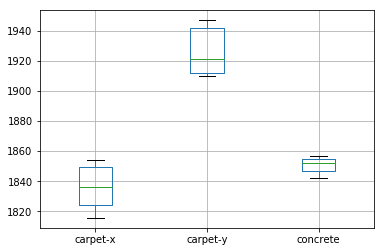

In [37]:
df.loc[:, ['surface', 'ticks_per_in']].pivot(columns='surface', values='ticks_per_in').boxplot()

In [38]:
df.loc[:, ['surface', 'ticks_per_in']].pivot(columns='surface', values='ticks_per_in').describe()

surface,carpet-x,carpet-y,concrete
count,20.000000,16.000000,16.000000
mean,1835.856416,1926.040203,1850.785187
std,13.367131,15.335982,4.754852
min,1815.682443,1909.833230,1842.396413
25%,1824.102210,1911.686299,1846.639625
50%,1836.236780,1921.415224,1851.896879
75%,1849.252916,1941.875921,1854.864040
max,1853.863081,1946.806671,1856.430493


Text(0.5,1,'Concrete')

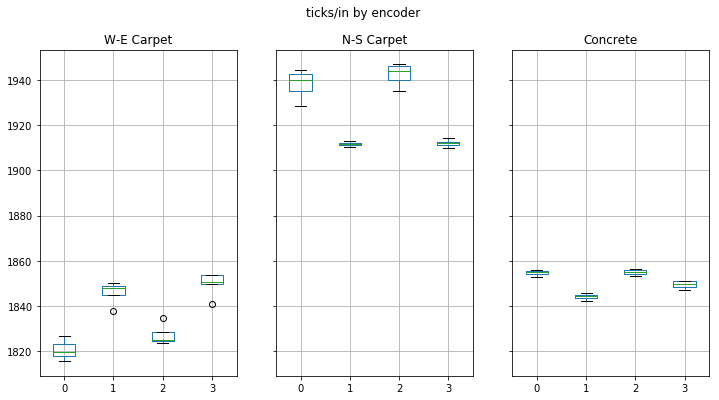

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=3,sharey=True)
fig.set_size_inches(12, 6)
fig.suptitle("ticks/in by encoder")
df.loc[df['surface'] == 'carpet-x', ['encoder', 'ticks_per_in']].pivot(columns='encoder', values='ticks_per_in').boxplot(ax=ax[0])
ax[0].set_title("W-E Carpet")
df.loc[df['surface'] == 'carpet-y', ['encoder', 'ticks_per_in']].pivot(columns='encoder', values='ticks_per_in').boxplot(ax=ax[1])
ax[1].set_title("N-S Carpet")
df.loc[df['surface'] == 'concrete', ['encoder', 'ticks_per_in']].pivot(columns='encoder', values='ticks_per_in').boxplot(ax=ax[2])
ax[2].set_title("Concrete")

### ticks/inch on carpet from west to east (`carpet-x`), by encoder

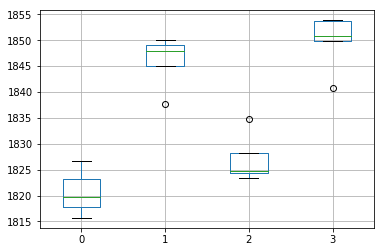

In [39]:
df.loc[df['surface'] == 'carpet-x', ['encoder', 'ticks_per_in']].pivot(columns='encoder', values='ticks_per_in').boxplot()

In [40]:
df.loc[df['surface'] == 'carpet-x', ['encoder', 'ticks_per_in']].pivot(columns='encoder', values='ticks_per_in').describe()

encoder,0,1,2,3
count,5.000000,5.000000,5.000000,5.000000
mean,1820.603509,1845.913267,1827.125704,1849.783183
std,4.339524,4.961973,4.658048,5.349425
min,1815.682443,1837.701657,1823.425954,1840.732439
25%,1817.762836,1844.948580,1824.327628,1849.897160
50%,1819.812740,1847.926829,1824.798158,1850.780488
75%,1823.170732,1849.038168,1828.304878,1853.642748
max,1826.588792,1849.951100,1834.771902,1853.863081


### ticks/inch on carpet from north to south carpet (`carpet-y`), by encoder

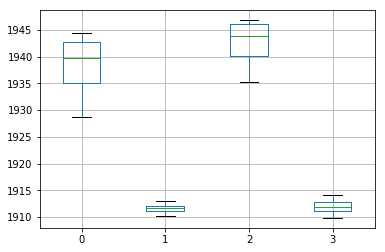

In [41]:
df.loc[df['surface'] == 'carpet-y', ['encoder', 'ticks_per_in']].pivot(columns='encoder', values='ticks_per_in').boxplot()

In [42]:
df.loc[df['surface'] == 'carpet-y', ['encoder', 'ticks_per_in']].pivot(columns='encoder', values='ticks_per_in').describe()

encoder,0,1,2,3
count,4.000000,4.000000,4.000000,4.000000
mean,1938.144860,1911.611420,1942.429496,1911.975036
std,6.998338,1.155924,5.250674,1.792218
min,1928.653295,1910.179123,1935.280927,1909.833230
25%,1935.107768,1911.211447,1940.125787,1911.181184
50%,1939.770361,1911.630227,1943.815194,1911.944881
75%,1942.807453,1912.030199,1946.118903,1912.738732
max,1944.385423,1913.006104,1946.806671,1914.177152


### ticks/inch on concrete (`concrete`), by encoder

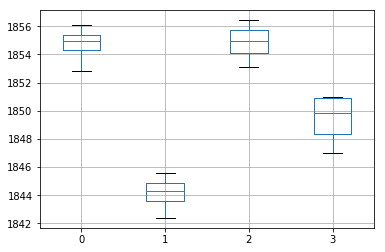

In [43]:
df.loc[df['surface'] == 'concrete', ['encoder', 'ticks_per_in']].pivot(columns='encoder', values='ticks_per_in').boxplot()

In [44]:
df.loc[df['surface'] == 'concrete', ['encoder', 'ticks_per_in']].pivot(columns='encoder', values='ticks_per_in').describe()

encoder,0,1,2,3
count,4.000000,4.000000,4.000000,4.000000
mean,1854.709093,1844.151536,1854.859578,1849.420539
std,1.369316,1.337576,1.418022,1.883548
min,1852.830393,1842.396413,1853.134328,1847.002691
25%,1854.283705,1843.572554,1854.083582,1848.387841
50%,1854.959939,1844.329650,1854.936746,1849.858051
75%,1855.385327,1844.908631,1855.712742,1850.890750
max,1856.086099,1845.550430,1856.430493,1850.963365
